<a href="https://colab.research.google.com/github/monakeshvari/used_cars_prediction_model/blob/main/used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [605]:
%matplotlib inline

from google.colab import drive

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import re

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Read Data

In [606]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [607]:
# Read data from CSV file
df = pd.read_csv('/content/drive/MyDrive/used_cars.csv')

# Exploration

In [608]:
print("Dataset shape:", df.shape)
print(100 * '-')
print("First 10 rows of head:\n", df.head(10))
print(100 * '-')
print("Last 10 rows of tail:\n", df.tail(10))
print(100 * '-')
print("Random sample of 50 rows:\n", df.sample(50))
print(100 * '-')
print("Columns in the dataset:", df.columns)
print(100 * '-')
print("Data types of columns:\n", df.dtypes)
print(100 * '-')
print("Basic statistics:\n", df.describe())
print(100 * '-')
print("Number of unique values per column:\n", df.nunique())

Dataset shape: (8128, 13)
----------------------------------------------------------------------------------------------------
First 10 rows of head:
                                    name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
5         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
6          Maruti Wagon R LXI DUO BSIII  2007          96000     175000   
7                    Maruti 800 DX BSII  2001          45000       5000   
8                      Toyota Etios VXD  2011         350000      90000   
9  Ford Figo Diesel Celebration Edition  2013         200000     169000   

     fuel seller_type t

# Preprocess

## Clean Duplicates

In [609]:
# Drop duplicates
print(df.duplicated().sum())
df = df.drop_duplicates()
df.shape

1202


(6926, 13)

## Clean Nulls

In [610]:
# Drop Nulls
print(df.isnull().sum())
df = df.dropna()
df.shape

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64


(6717, 13)

In [611]:
df = df.reset_index(drop=True)
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6712,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6713,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
6714,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6715,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6716,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


## Cleaning columns

### Clean 'name' column

In [612]:
def extract_brand(name):
    '''
    Extracts the brand name from the car name.

    Args:
        name (str): The full name of the car.

    Returns:
        str: The extracted brand name.
    '''
    match = r'\S+'
    return re.search(match, name).group(0)

df.insert(0, 'brand', df['name'].apply(extract_brand))
df = df.drop('name', axis=1)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Clean 'mileage' column

In [613]:
[row for row in df['mileage'] if 'kmpl' not in row]

['17.3 km/kg',
 '33.44 km/kg',
 '26.2 km/kg',
 '26.6 km/kg',
 '20.88 km/kg',
 '30.46 km/kg',
 '26.2 km/kg',
 '21.94 km/kg',
 '21.94 km/kg',
 '21.94 km/kg',
 '26.2 km/kg',
 '17.3 km/kg',
 '13.45 km/kg',
 '17.3 km/kg',
 '17.3 km/kg',
 '32.52 km/kg',
 '26.6 km/kg',
 '13.45 km/kg',
 '26.6 km/kg',
 '26.2 km/kg',
 '21.94 km/kg',
 '26.6 km/kg',
 '26.6 km/kg',
 '26.2 km/kg',
 '26.2 km/kg',
 '11.88 km/kg',
 '26.2 km/kg',
 '21.94 km/kg',
 '26.3 km/kg',
 '23.7 km/kg',
 '26.6 km/kg',
 '13.45 km/kg',
 '19.2 km/kg',
 '26.2 km/kg',
 '26.6 km/kg',
 '17.8 km/kg',
 '21.94 km/kg',
 '10.9 km/kg',
 '26.2 km/kg',
 '13.45 km/kg',
 '17.3 km/kg',
 '19.2 km/kg',
 '21.94 km/kg',
 '26.6 km/kg',
 '33.44 km/kg',
 '26.6 km/kg',
 '26.6 km/kg',
 '30.46 km/kg',
 '21.1 km/kg',
 '19.2 km/kg',
 '26.6 km/kg',
 '21.94 km/kg',
 '21.94 km/kg',
 '26.3 km/kg',
 '21.94 km/kg',
 '21.94 km/kg',
 '13.2 km/kg',
 '21.4 km/kg',
 '16.6 km/kg',
 '16.0 km/kg',
 '26.2 km/kg',
 '13.2 km/kg',
 '21.94 km/kg',
 '17.3 km/kg',
 '22.8 km/kg',
 '

In [614]:
def convert_kmkg_to_kmpl(km_per_kg, energy_content_cng, energy_content_petrol):
    '''
    Convert fuel efficiency from km/kg (CNG) to kmpl (petrol).

    Args:
        km_per_kg (float): Fuel efficiency in km per kg.
        energy_content_cng (float): Energy content of CNG in MJ/kg.
        energy_content_petrol (float): Energy content of petrol in MJ/l.

    Returns:
        float: Fuel efficiency in kmpl.
    '''
    return km_per_kg * (energy_content_cng / energy_content_petrol)

In [615]:
energy_content_cng = 53.6  # MJ per kilogram
energy_content_petrol = 34.2  # MJ per liter

def convert_mileage(mileage):
    '''
    Converts mileage values to kmpl.

    Args:
        mileage (str): The mileage value as a string.

    Returns:
        float: The cleaned mileage value in kmpl.
    '''
    match = re.search(r'(\d+\.*\d+)', mileage)
    if 'kmpl' not in mileage:
        return float(f"{convert_kmkg_to_kmpl(float(match.group(0)), energy_content_cng, energy_content_petrol):.2f}")
    return float(match.group(0))

In [616]:
df['mileage'] = df['mileage'].apply(convert_mileage)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Clean 'engine' & 'max_power' column

In [617]:
[row for row in df['engine'] if 'CC' not in row]

[]

In [618]:
[row for row in df['max_power'] if 'bhp' not in row]

[]

In [619]:
def match_return(column):
    """
    Extracts numeric value from a string column.

    Args:
        column (str): The column value as a string.

    Returns:
        str: The extracted numeric value.
    """
    match = re.search(r'(\d+\.*\d*)', column)
    return match.group(0)

In [620]:
# Clean 'engine' column
df['engine'] = df['engine'].apply(match_return)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [621]:
# Clean 'max_power' column
df['max_power'] = df['max_power'].apply(match_return)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


### Clean 'torque' column

In [622]:
df['torque'] = df['torque'].astype('str')
df['torque'] = (df['torque']
                             .str.replace(' ', '')
                             .str.replace(',', '')
                             .str.replace('+/-500', '')
                             .str.replace('at', '@')
                             .str.replace('/', '@')
                             .str.lower())

In [623]:
def convert_torque(torque):
    '''
    Converts torque values to a uniform format.

    Args:
        torque (str): The torque value as a string.

    Returns:
        str: The cleaned torque value.
    '''
    match = re.search(r'(\d+\.*\d*)', torque)
    if 'kgm' in torque:
        return f"{float(match.group(0)) * 9.80665:.2f}"  # Convert kgm to nm
    return match.group(0)

df['torque'] = df['torque'].apply(convert_torque)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74,190,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78,124.54,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90,219.67,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2,112.78,5.0


## Change column data types

In [624]:
df.nunique()

brand             31
year              27
selling_price    670
km_driven        898
fuel               4
seller_type        3
transmission       2
owner              5
mileage          393
engine           121
max_power        320
torque           251
seats              9
dtype: int64

In [625]:
df.dtypes

brand             object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [626]:
df['engine'] = df['engine'].astype('int')
df['max_power'] = df['max_power'].astype('float')
df['torque'] = df['torque'].astype('float')
df['seats'] = df['seats'].astype('int')

## Outlier data

In [627]:
def check_outlier_column_by_plotly(data, columns):
  fig = px.box(data, y = columns)
  fig.show()

check_outlier_column_by_plotly(df, ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats'])

In [628]:
def remove_outliers(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return data[(data >= lower_bound) & (data <= upper_bound)]

columns = ['selling_price', 'km_driven']
for col in columns:
  df[col] = remove_outliers(df[col])

df.isnull().sum()    # Replaced outliers with Nans

brand              0
year               0
selling_price    306
km_driven        161
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
torque             0
seats              0
dtype: int64

In [629]:
def fillna(data):
  data.fillna(value = {
      'selling_price' : data.selling_price.mean(),
      'km_driven' : data.km_driven.mean()
  }, inplace = True)
  return data

df = fillna(df)

## Data Visualization (Bar plot)

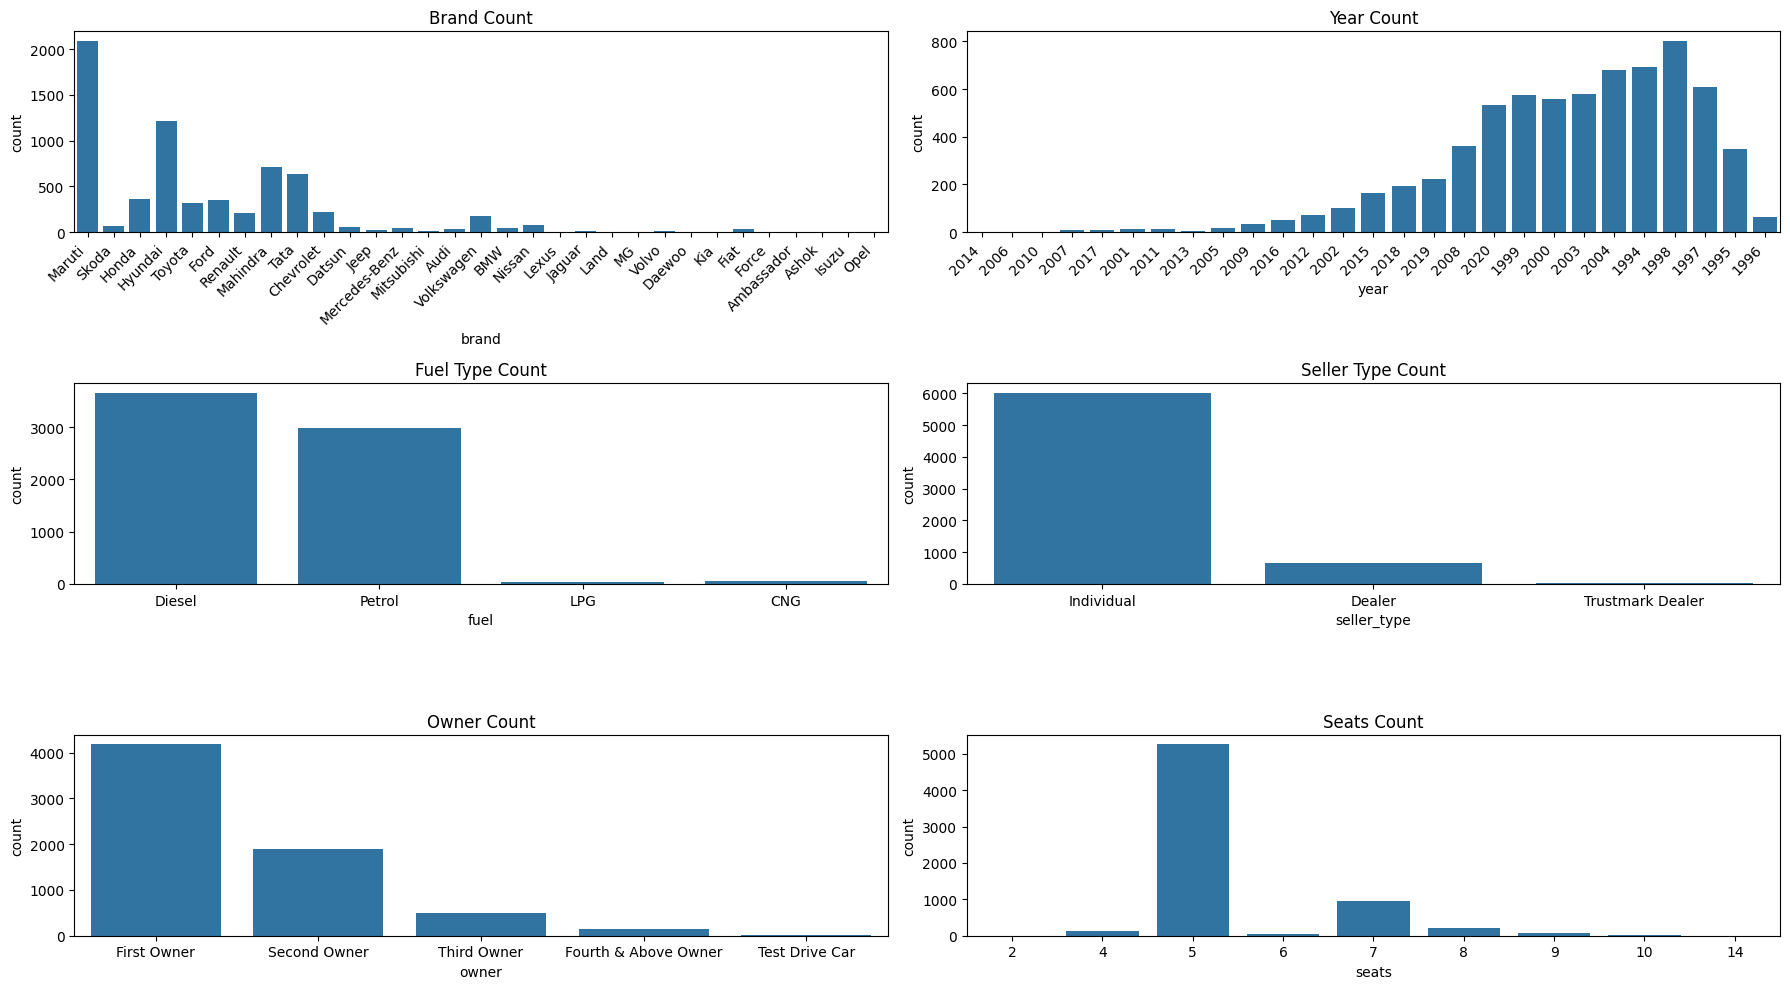

In [630]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))

# Create a bar plot for each column
sns.countplot(ax=axes[0, 0], data=df, x='brand')
axes[0, 0].set_title('Brand Count')
axes[0, 0].set_xticks(range(len(df['brand'].unique())))
axes[0, 0].set_xticklabels(df['brand'].unique(), rotation=45, ha='right')

sns.countplot(ax=axes[0, 1], data=df, x='year')
axes[0, 1].set_title('Year Count')
axes[0, 1].set_xticks(range(len(df['year'].unique())))
axes[0, 1].set_xticklabels(df['year'].unique(), rotation=45, ha='right')

sns.countplot(ax=axes[1, 0], data=df, x='fuel')
axes[1, 0].set_title('Fuel Type Count')
axes[1, 0].set_xticks(range(len(df['fuel'].unique())))

sns.countplot(ax=axes[1, 1], data=df, x='seller_type')
axes[1, 1].set_title('Seller Type Count')
axes[1, 1].set_xticks(range(len(df['seller_type'].unique())))

sns.countplot(ax=axes[2, 0], data=df, x='owner')
axes[2, 0].set_title('Owner Count')
axes[2, 0].set_xticks(range(len(df['owner'].unique())))

sns.countplot(ax=axes[2, 1], data=df, x='seats')
axes[2, 1].set_title('Seats Count')
axes[2, 1].set_xticks(range(len(df['seats'].unique())))

# Adjust the layout
plt.tight_layout()
plt.show()

## Encoding

In [631]:
df.nunique()

brand             31
year              27
selling_price    546
km_driven        832
fuel               4
seller_type        3
transmission       2
owner              5
mileage          393
engine           121
max_power        318
torque           250
seats              9
dtype: int64

In [632]:
# One-Hot Encoding

def one_hot_encoder(data, columns):
  return pd.get_dummies(data, columns = columns)

df = one_hot_encoder(df, ['transmission'])

df['transmission_Automatic'] = df['transmission_Automatic'].astype('int')
df['transmission_Manual'] = df['transmission_Manual'].astype('int')

In [633]:
# Label Encoding

def label_encoder(data, columns):
  le = LabelEncoder()
  for col in columns:
    data[col] = le.fit_transform(data[col])
  return data

df = label_encoder(df, ['brand', 'year', 'fuel', 'seller_type', 'owner', 'seats'])
df

,brand,year,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,max_power,torque,seats,transmission_Automatic,transmission_Manual
0,20,20,450000.0,145500.0,1,1,0,23.40,1248,74.00,190.00,2,0,1
1,26,20,370000.0,120000.0,1,1,2,21.14,1498,103.52,250.00,2,0,1
2,10,12,158000.0,140000.0,3,1,4,17.70,1497,78.00,124.54,2,0,1
3,11,16,225000.0,127000.0,1,1,0,23.00,1396,90.00,219.67,2,0,1
4,20,13,130000.0,120000.0,3,1,0,16.10,1298,88.20,112.78,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,20,19,260000.0,50000.0,3,1,2,18.90,998,67.10,90.00,2,0,1
6713,11,20,475000.0,80000.0,1,1,2,22.54,1396,88.73,219.70,2,0,1
6714,11,19,320000.0,110000.0,3,1,0,18.50,1197,82.85,113.70,2,0,1
6715,11,13,135000.0,119000.0,1,1,1,16.80,1493,110.00,235.36,2,0,1


## Transforamtion

============================================================Transformation for brand============================================================


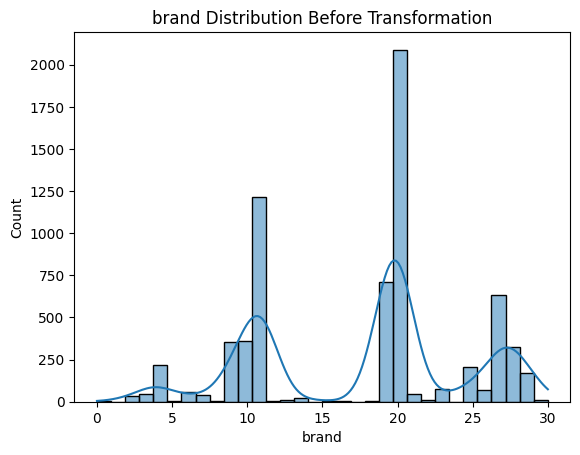

skewness before transformation : -0.22665203848332083
Skewness after Square Root transformation: -0.6928898465767209
Skewness after Logarithm transformation: -1.2490579785616205
Skewness after Reciprocal transformation: 40.951185008151306
Skewness after Box-Cox transformation: -0.1723255276027878


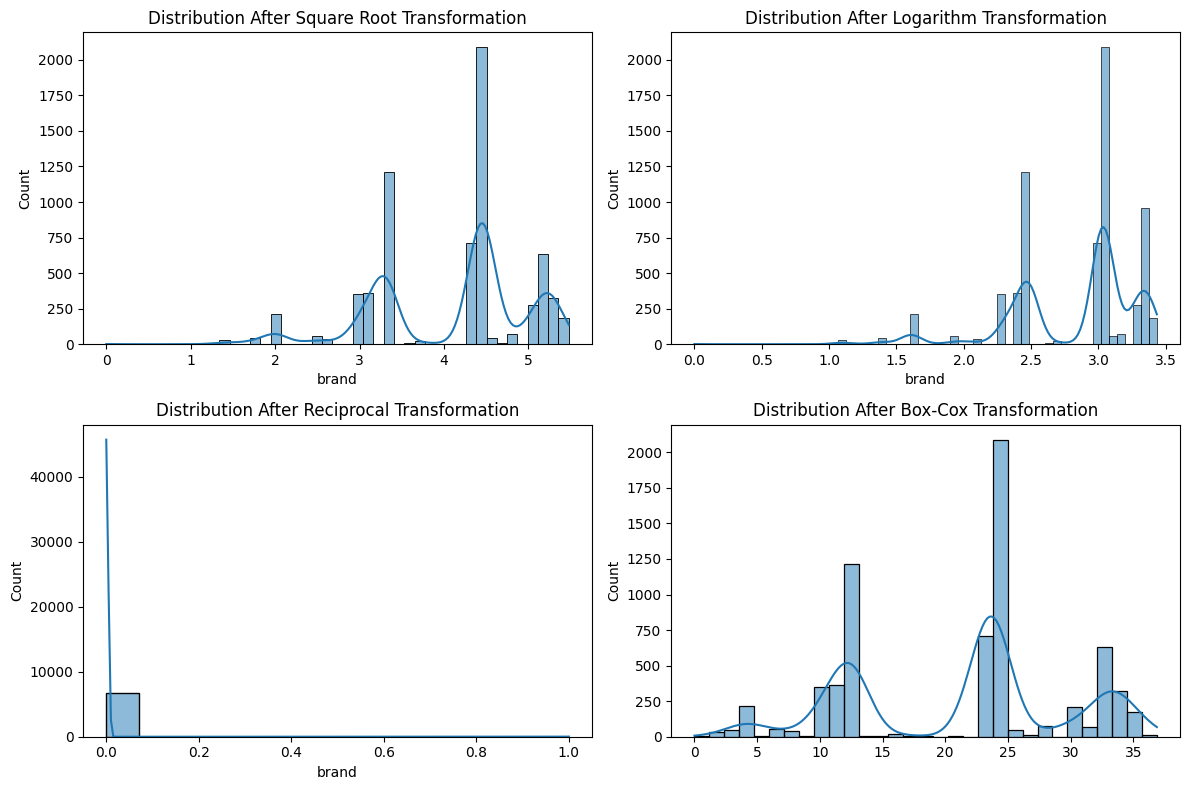

============================================================Transformation for year============================================================


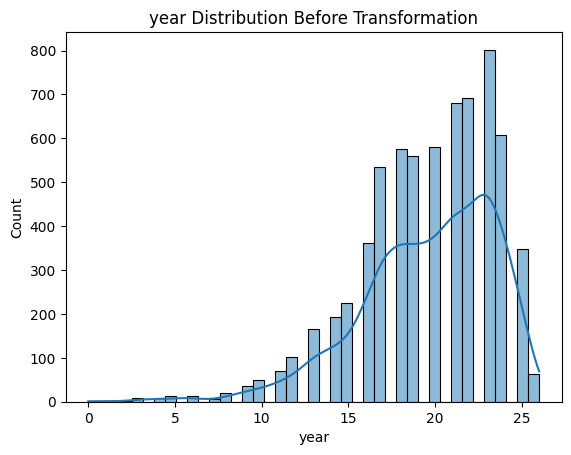

skewness before transformation : -0.9314711730482037
Skewness after Square Root transformation: -1.6460023660150085
Skewness after Logarithm transformation: -2.7635492125087815
Skewness after Reciprocal transformation: 57.939619892465494
Skewness after Box-Cox transformation: -0.16069825529998782


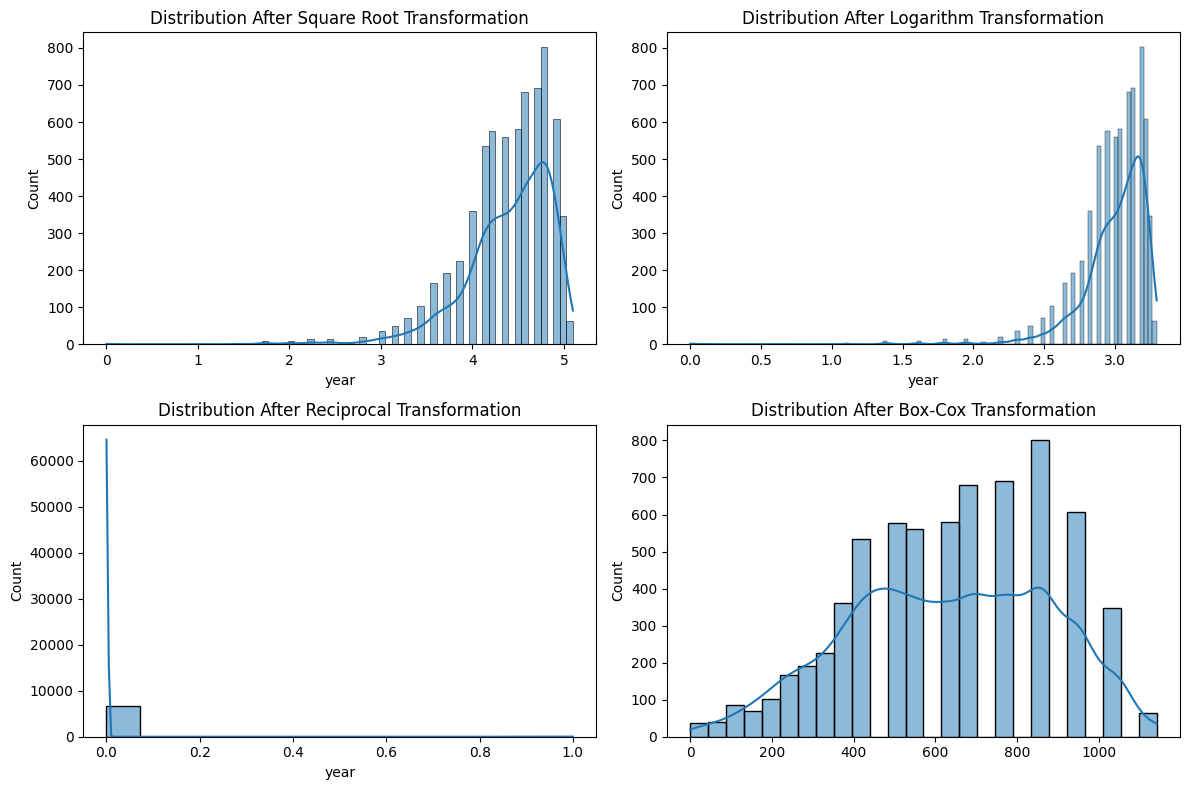

============================================================Transformation for selling_price============================================================


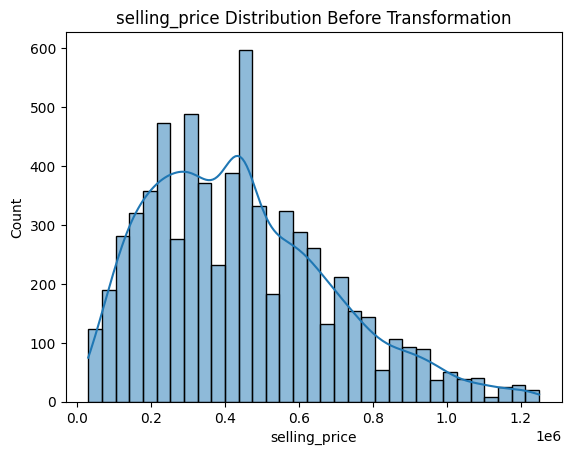

skewness before transformation : 0.7115865067179582
Skewness after Square Root transformation: 0.047725477065074545
Skewness after Logarithm transformation: -0.7643575916943762
Skewness after Reciprocal transformation: 3.4732770055888946
Skewness after Box-Cox transformation: -0.0467339042774555


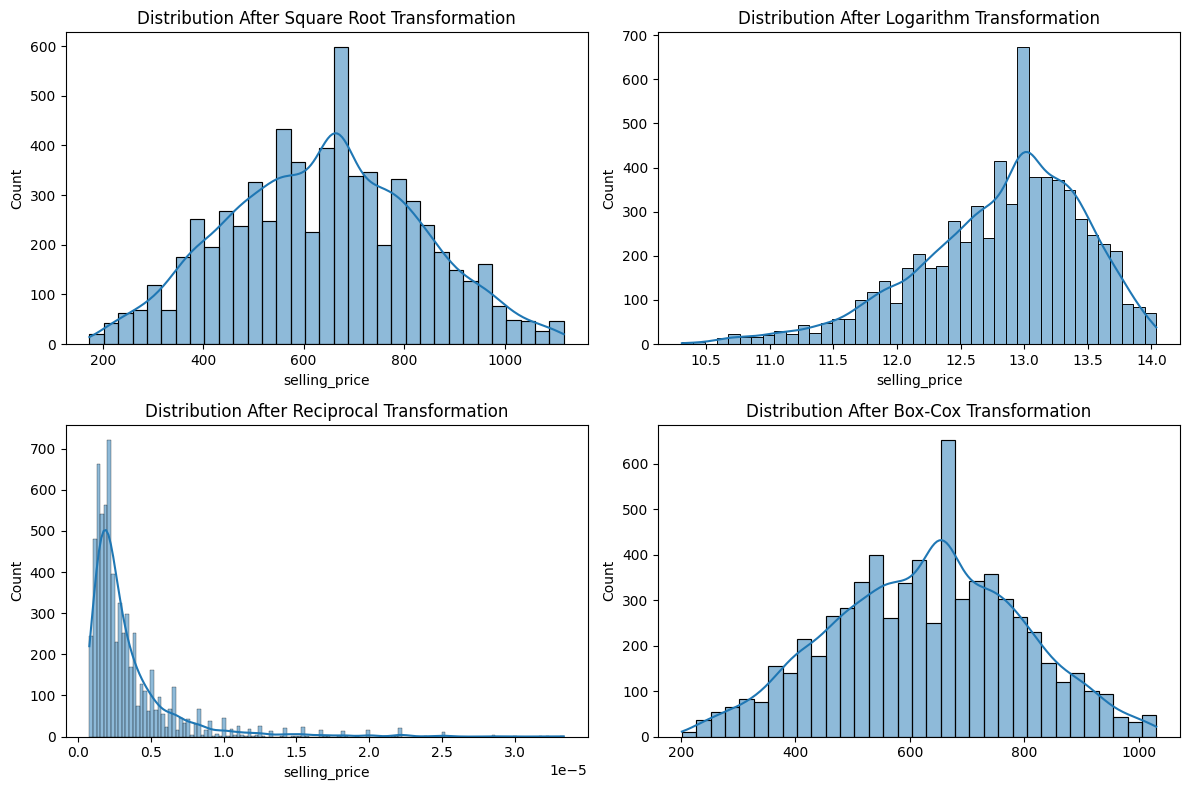

============================================================Transformation for mileage============================================================


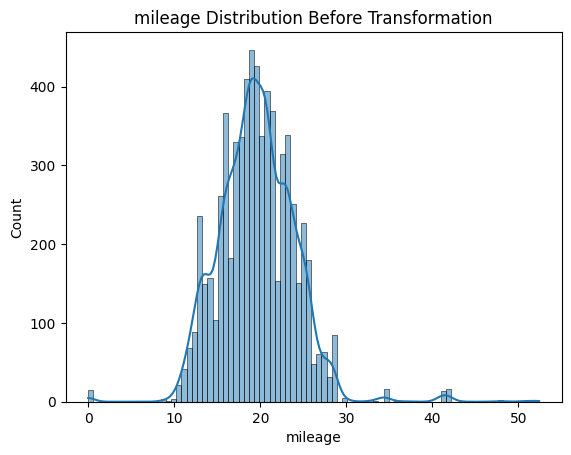

skewness before transformation : 0.7313555283557372
Skewness after Square Root transformation: -1.0143759285442437
Skewness after Logarithm transformation: -3.790268113526155
Skewness after Reciprocal transformation: 19.391887739254585
Skewness after Box-Cox transformation: 0.2766876084345927


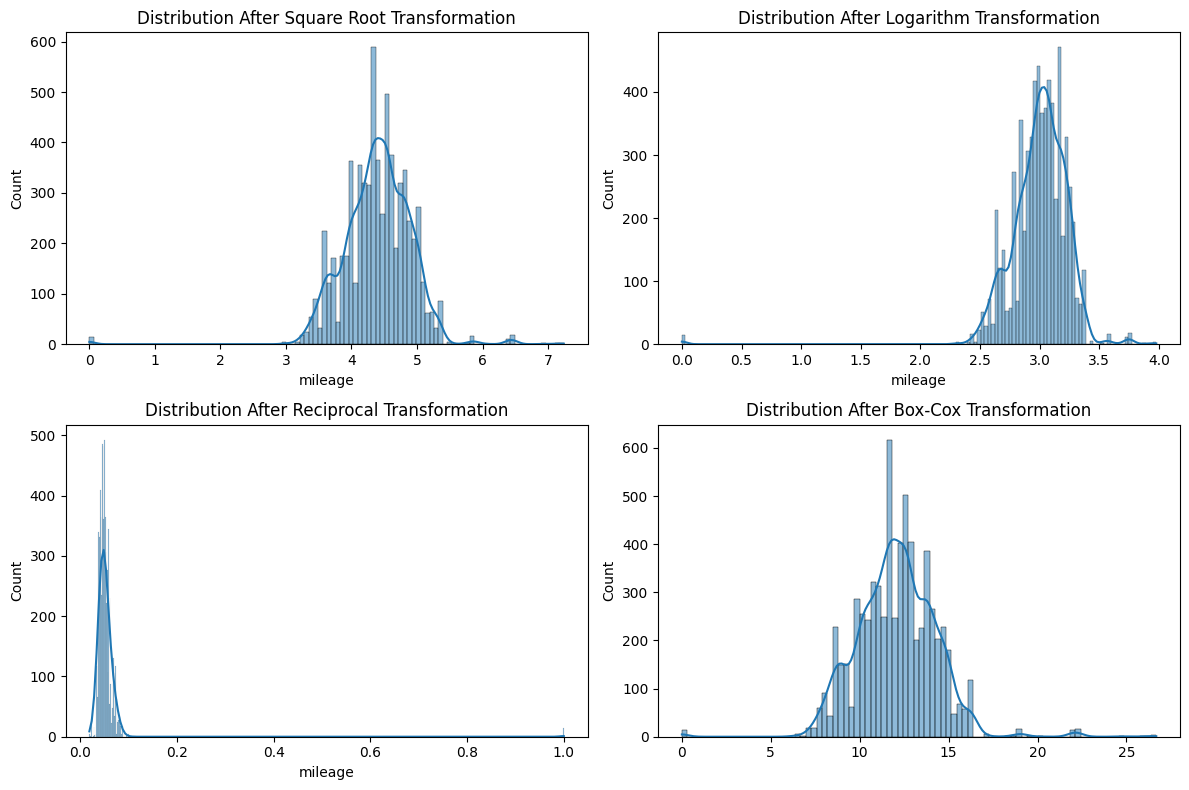

============================================================Transformation for engine============================================================


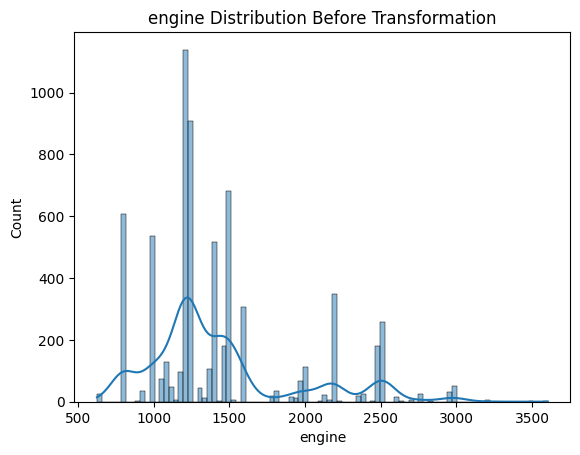

skewness before transformation : 1.215730898452021
Skewness after Square Root transformation: 0.856686041441954
Skewness after Logarithm transformation: 0.4579895208558943
Skewness after Reciprocal transformation: 0
Skewness after Box-Cox transformation: 0.0071486879447998425


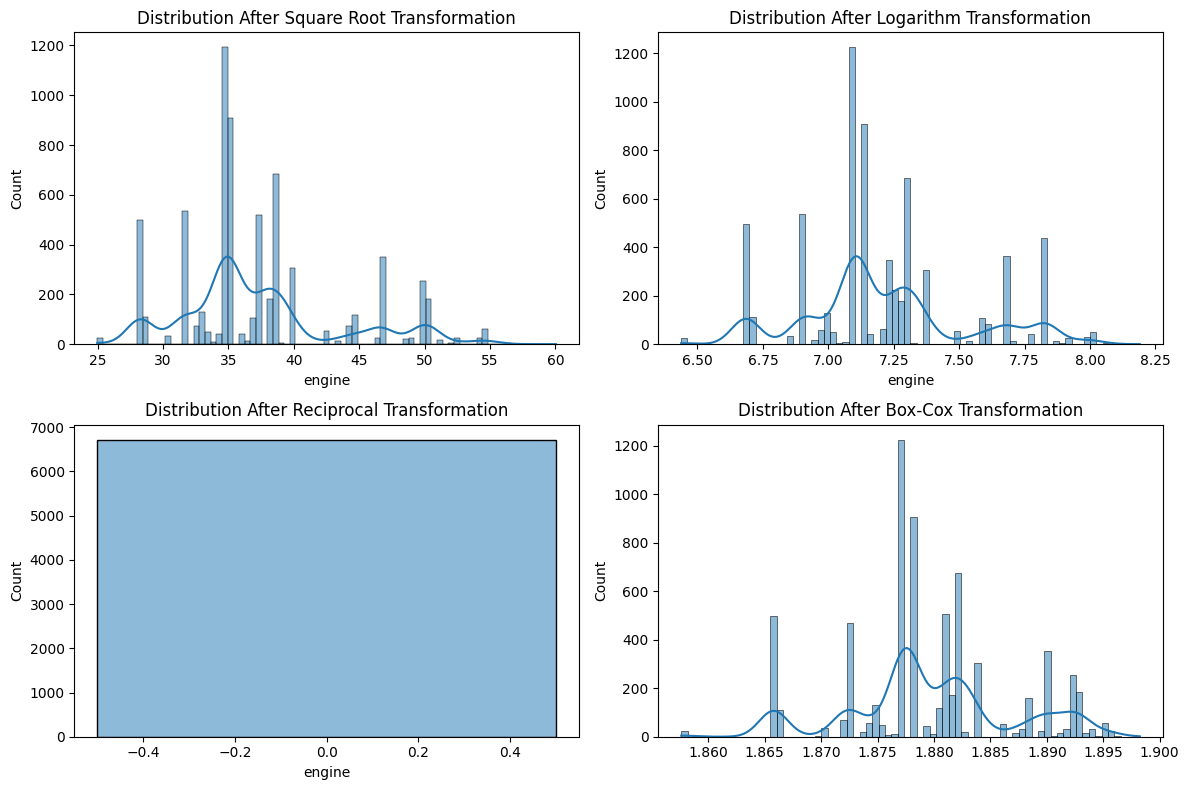

============================================================Transformation for max_power============================================================


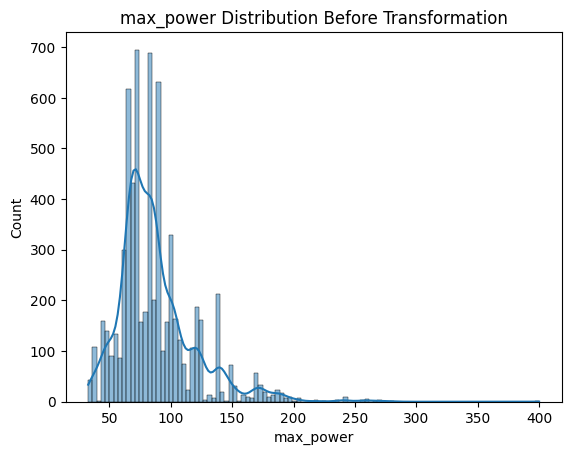

skewness before transformation : 1.711327356932203
Skewness after Square Root transformation: 0.9420235082181577
Skewness after Logarithm transformation: 0.281198493598732
Skewness after Reciprocal transformation: 1.0190283288354476
Skewness after Box-Cox transformation: -0.015929551807809736


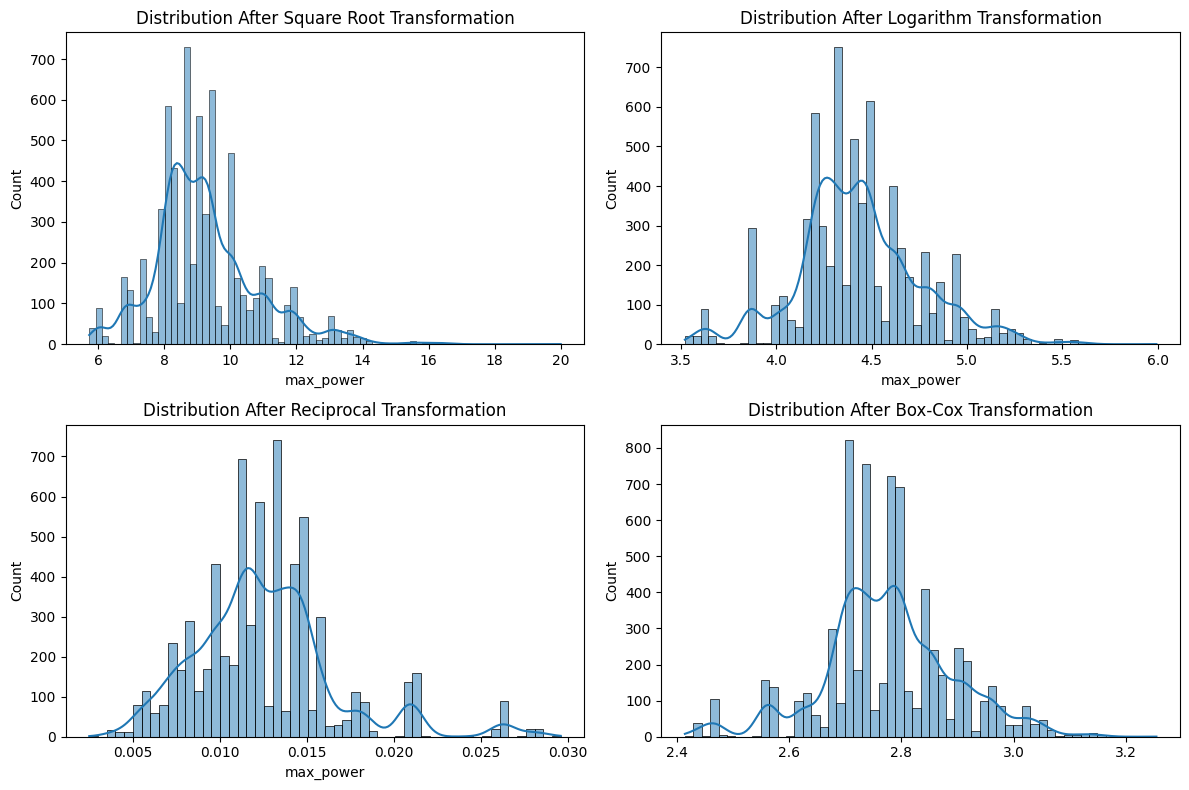

============================================================Transformation for torque============================================================


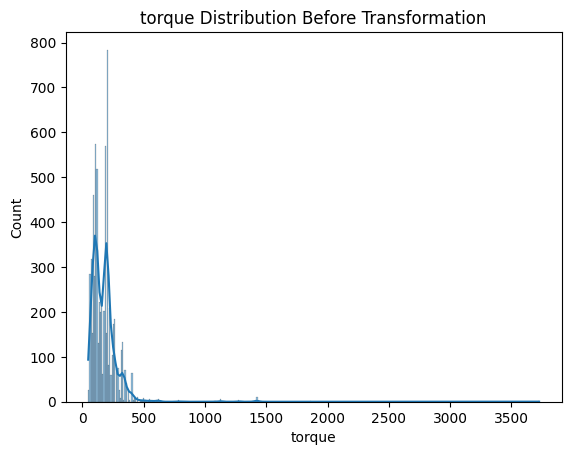

skewness before transformation : 8.184212188611774
Skewness after Square Root transformation: 1.868199361530272
Skewness after Logarithm transformation: 0.2480333238388119
Skewness after Reciprocal transformation: 0.9424050495654162
Skewness after Box-Cox transformation: -0.0010374883743193234


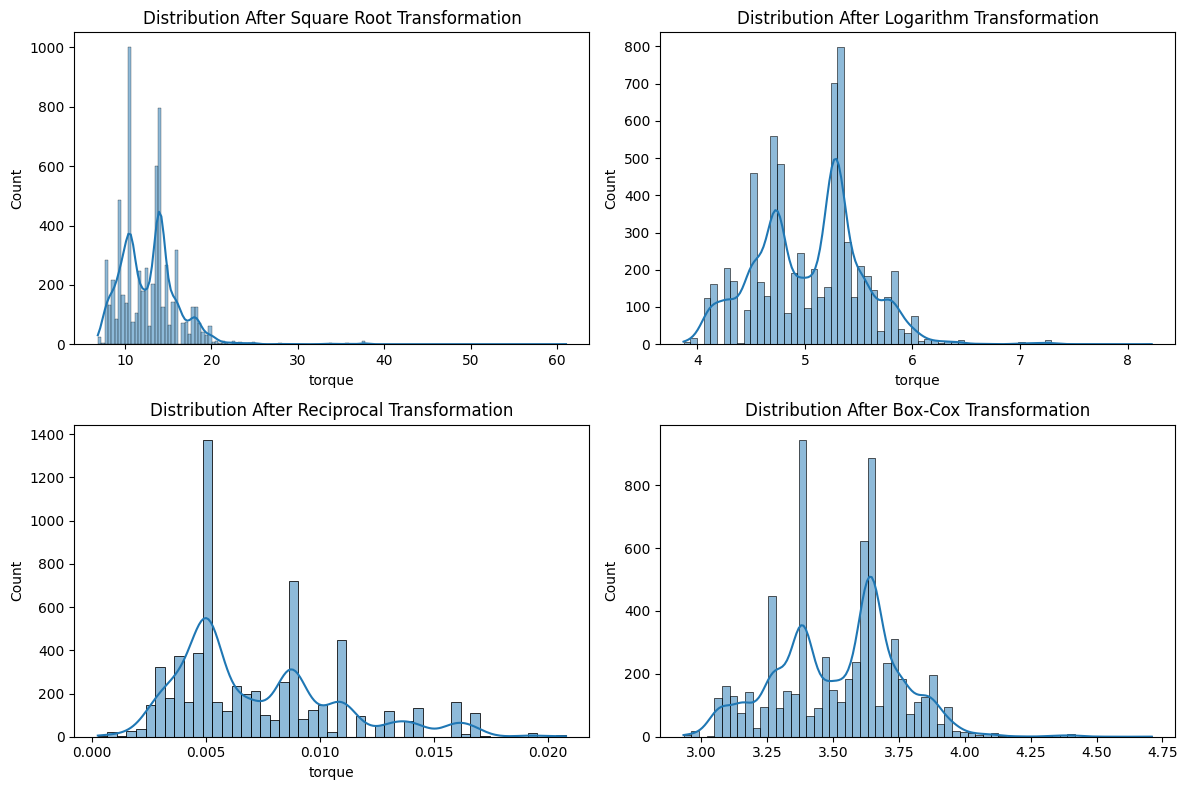

In [634]:
# Plot column distribution before Transformation
def before_plot(data, column):
  data = data.copy()
  if column not in data.columns:
    print(f'Column {column} does not exist in the DataFrame')
    return
  sns.histplot(data[column], kde=True)
  plt.title(f'{column} Distribution Before Transformation')
  plt.show()

# Calculate and print skewness before transformation
def before_skewness(data, column):
  data = data.copy()
  if column not in data.columns:
    print(f'Column {column} does not exist in the DataFrame')
    return
  before_skew = df[column].skew()
  print(f'skewness before transformation : {before_skew}')

# Apply various transformations
def transformations(data, column):
  data = data.copy()
  if column not in data.columns:
    print(f'Column {column} does not exist in the DataFrame')
    return
  transformations={
      'Square Root' : np.sqrt(data[column]),
      'Logarithm' : np.log1p(data[column]),
      'Reciprocal' : np.reciprocal(data[column] + 1),   # Add 1 to avoid division by zero
      'Box-Cox' : stats.boxcox(data[column] + 1)[0]   # Add 1 to ensure all values are positive
  }
  return transformations

# Calculate and print skewness after transformation
def after_skewness(transformations):
  for name, transformed in transformations.items():
    skewness_after = pd.Series(transformed).skew()  # Convert NumPy array to pandas Series and calculate skewness
    print(f'Skewness after {name} transformation: {skewness_after}')

# Plot the transformed distributions and calculate skewness
def plot_transformations(transformations):
  # Define the layout of subplots
  fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns
  for (name, transformed), ax in zip(transformations.items(), axes.ravel()):
      sns.histplot(transformed, kde=True, ax=ax)
      ax.set_title(f'Distribution After {name} Transformation')

  plt.tight_layout()
  plt.show()

columns = ['brand', 'year', 'selling_price', 'mileage', 'engine', 'max_power', 'torque'] # Columns for transformation
for column in columns :
  print(f"{60*'='}Transformation for {column}{60*'='}")
  before_plot(df, column) # plot column distribution before transformation
  before_skewness(df, column) # skewness before column transformation
  transformed_data = transformations(df, column)
  if transformed_data :
    after_skewness(transformed_data)  # skewness after column transformation
    plot_transformations(transformed_data)  # plot column distribution after transformation

In [635]:
# apply best transformation to columns
df.loc[:, 'brand'] = stats.boxcox(df['brand'] + 1)[0]
df.loc[:, 'year'] = stats.boxcox(df['year'] + 1)[0]
df.loc[:, 'mileage'] = stats.boxcox(df['mileage'] + 1)[0]
df.loc[:, 'engine'] = stats.boxcox(df['engine'] + 1)[0]
df.loc[:, 'max_power'] = stats.boxcox(df['max_power'] + 1)[0]
df.loc[:, 'torque'] = stats.boxcox(df['torque'] + 1)[0]

## Standardization

In [636]:
# Initialize StandardScaler
scaler = StandardScaler()

df_columns = df.columns

# Fit and transform the data
scaled_df = scaler.fit_transform(df)

# Convert the scaled features back to a DataFrame, preserving the column names
df = pd.DataFrame(scaled_df, columns=df_columns)

## Define X and y


In [637]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5373, 13), (1344, 13), (5373,), (1344,))

## Data Visualization (Correlation)

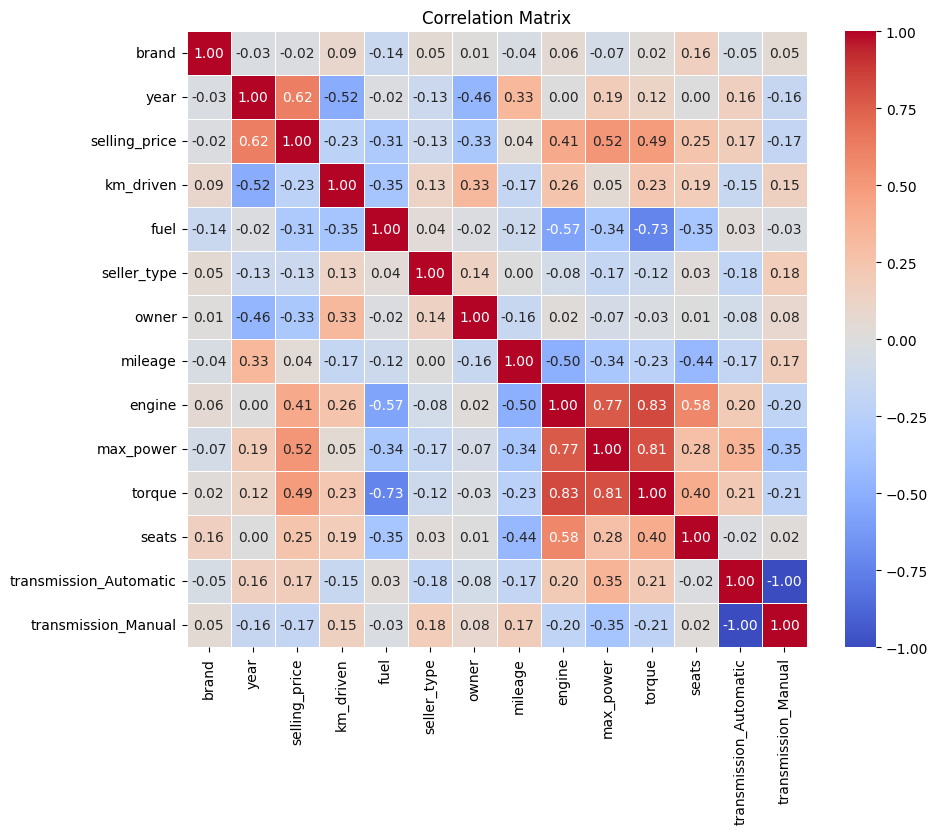

In [638]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Data Visualization (Regression plot)

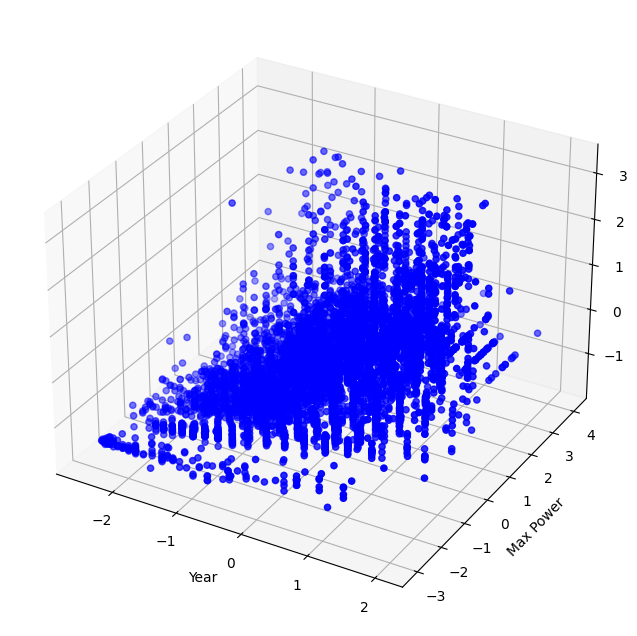

In [639]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['year'], df['max_power'], y, color='blue')
ax.set_xlabel('Year')
ax.set_ylabel('Max Power')
ax.set_zlabel('Engine')
plt.show()

# Modeling and Prediction

## Single Linear Regression

In [640]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_single = X_train[['year']]
X_test_single = X_test[['year']]

# Train the model
slr = LinearRegression()
slr.fit(X_train_single, y_train)

y_pred_single = slr.predict(X_test_single)

# Evaluate the model
mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)

print("Mean Squared Error (Single Feature):", mse_single)
print("R-squared (Single Feature):", r2_single)

Mean Squared Error (Single Feature): 0.5859637434188736
R-squared (Single Feature): 0.3921393107592024


## Multi Linear Regression

In [641]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

y_pred_multi = mlr_model.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("Mean Squared Error (Multiple Features):", mse_multi)
print("R-squared (Multiple Features):", r2_multi)

Mean Squared Error (Multiple Features): 0.38553553554997255
R-squared (Multiple Features): 0.6000573431405962


## Polynomial Linear Regression

In [642]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_model = make_pipeline(poly_features, LinearRegression())
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Mean Squared Error (Polynomial Regression):", mse_poly)
print("R-squared (Polynomial Regression):", r2_poly)

Mean Squared Error (Polynomial Regression): 0.319681343450585
R-squared (Polynomial Regression): 0.6683724480400373


# Cross Validation

## Ridge

In [643]:
# Define the models

alphas = [1e-4, 1e-3, 1e-2, 1e-1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

params_dict = [{'alpha': alpha} for alpha in alphas]

models = [Ridge(alpha=params['alpha']) for params in params_dict]


cv_scores = [cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean() for model in models]

best_model_index = np.argmax(cv_scores)
best_model = models[best_model_index]
r2_ridge = cv_scores[best_model_index]
print("Best Model:", best_model)
print("Best R-squared:", r2_ridge)


Best Model: Ridge()
Best R-squared: 0.5904861785253002


## Lasso

In [644]:
# Define the models

alphas = [1e-4, 1e-3, 1e-2, 1e-1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

params_dict = [{'alpha': alpha} for alpha in alphas]

models = [Lasso(alpha=params['alpha']) for params in params_dict]


cv_scores = [cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean() for model in models]

best_model_index = np.argmax(cv_scores)
best_model = models[best_model_index]
r2_lasso = cv_scores[best_model_index]
print("Best Model:", best_model)
print("Best R-squared:", r2_lasso)


Best Model: Lasso(alpha=0.0001)
Best R-squared: 0.5904855451661687


## ElasticNet

In [645]:
# Define the models

alphas = [1e-4, 1e-3, 1e-2, 1e-1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
l1_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

params_dict = [{'alpha': alpha, 'l1_ratio': l1_ratio} for alpha in alphas for l1_ratio in l1_ratios]

models = [ElasticNet(alpha=params['alpha'], l1_ratio=params['l1_ratio']) for params in params_dict]


cv_scores = [cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean() for model in models]

best_model_index = np.argmax(cv_scores)
best_model = models[best_model_index]
r2_elasticnet = cv_scores[best_model_index]
print("Best Model:", best_model)
print("Best R-squared:", r2_elasticnet)


Best Model: ElasticNet(alpha=0.001, l1_ratio=0.3)
Best R-squared: 0.5904916731736097


# Comprehesion

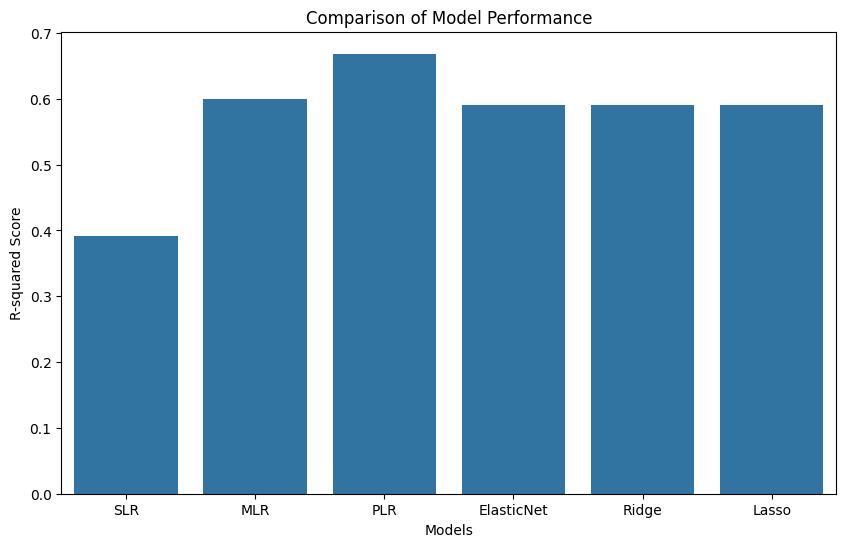

In [646]:
# prompt: Compare the results obtained from different models by drawing a graph

models = ['SLR', 'MLR', 'PLR','ElasticNet', 'Ridge', 'Lasso']
r2_scores = [r2_single, r2_multi,r2_poly ,r2_elasticnet, r2_ridge, r2_lasso]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores)
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of Model Performance')
plt.show()
